## летучка 5 - гетический алгоритм на полиноме для поиска минимума


In [16]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [17]:
# функция генерации случайной исходной популяции в заданном диапазоне
def generate_population(size, rrange):
    r1, r2 = rrange
#     return np.linspace(r1, r2, size)
    return [random.uniform(r1, r2) for _ in range(size)] 

In [18]:
# функция мутации с заданной вероятностью
def mutate(x, mutation_rate, rrange):
    r1, r2 = rrange
    if random.random() < mutation_rate:
        return random.uniform(r1, r2)
    return x

In [19]:
# функция выбора пары для скрещивания
# сортировка особей из популяции на основе их приспособленности и выбор лучших особей для скрещевания в количестве num
def select(population, fitness, number_of_parents):
    return sorted(population, key=fitness)[0:number_of_parents]

In [20]:
# функция скрещивания
def crossover(parents, number_of_children):
    return [((random.choice(parents) + random.choice(parents)) / 2) for _ in range(number_of_children)]

In [23]:
def genetic_algorithm(fitness, generations, population_size, x_range, mutation_rate):
    population = generate_population(population_size, x_range)
    best_solution = min(population, key=fitness)

    plt.figure()
    x = np.linspace(*x_range, 100)
    plt.plot(x, fitness(x), color='black')
    plt.scatter(population, np.array([fitness(p) for p in population]), color='green')
    plt.show()

    for generation in range(generations):
        parents = select(population, fitness, population_size // 2)
        children = crossover(parents, population_size - len(parents))
        population = parents + [mutate(child, mutation_rate, x_range) for child in children]
        current_best = min(population, key=fitness)
        
        if fitness(current_best) < fitness(best_solution):

            plt.figure()
            x = np.linspace(*x_range, 100)
            plt.plot(x, fitness(x), color='black')
            plt.scatter(population, np.array([fitness(p) for p in population]), color='green')
            plt.scatter(best_solution, fitness(best_solution), color='red')
            plt.show()
            
            best_solution = current_best
            print(f"Generation {generation}: Best solution = {best_solution}, Score = {fitness(best_solution)}")
    
    return best_solution

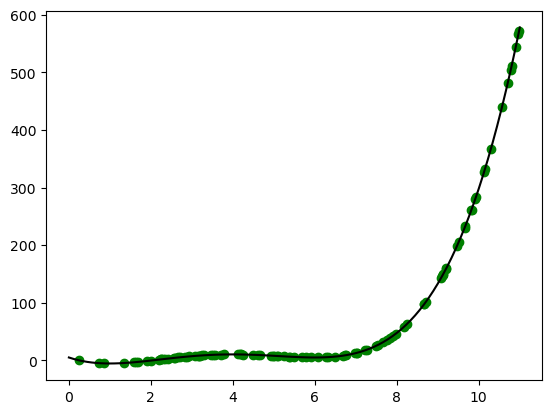

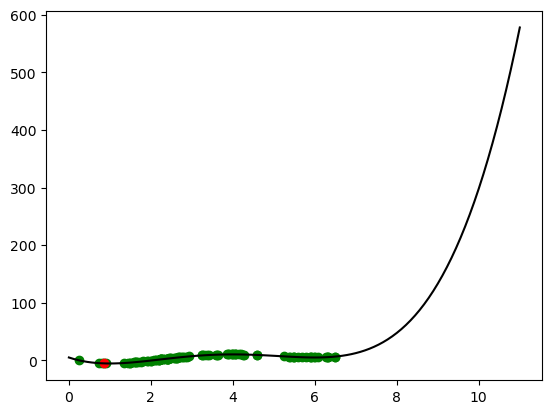

Generation 1: Best solution = 0.9173678036479309, Score = -5.363939827311613


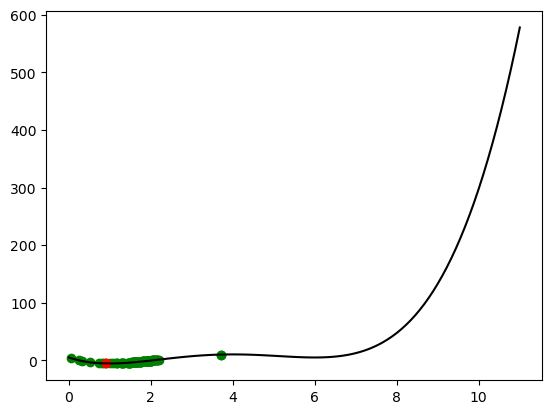

Generation 3: Best solution = 0.9968892849411547, Score = -5.41659401226264


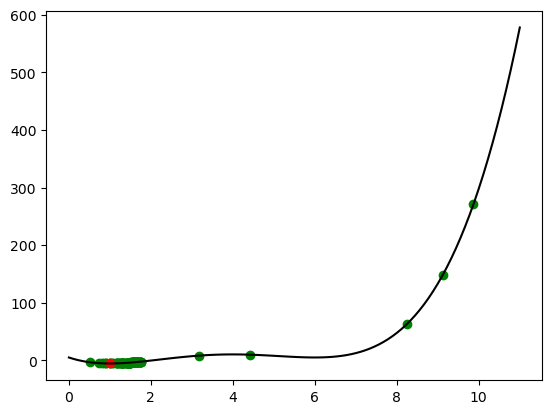

Generation 4: Best solution = 0.9982003322261974, Score = -5.416642360089932


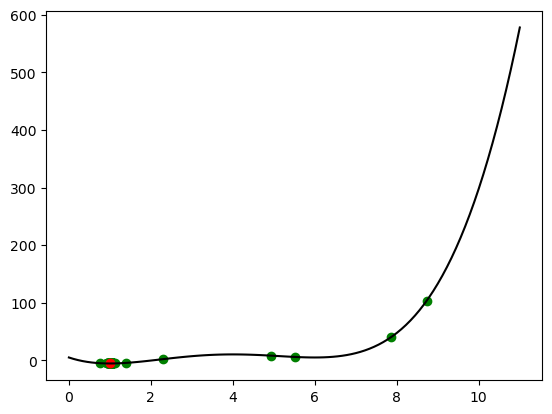

Generation 9: Best solution = 1.0003618505765288, Score = -5.416665684774207


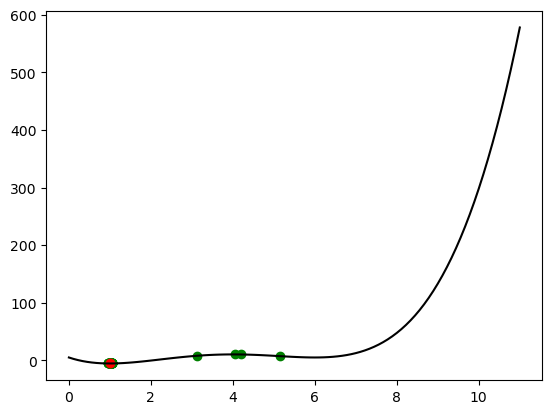

Generation 10: Best solution = 0.9998330492821352, Score = -5.41666645761019


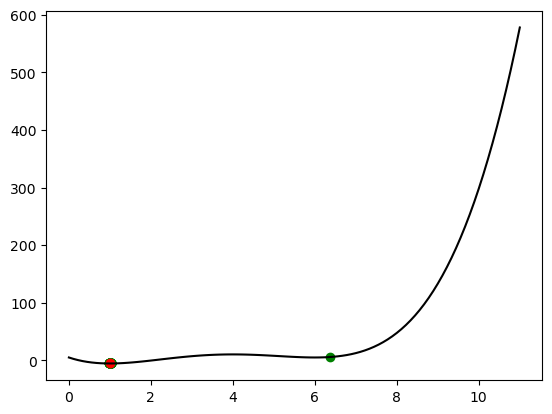

Generation 11: Best solution = 0.9999084632676021, Score = -5.41666660382232


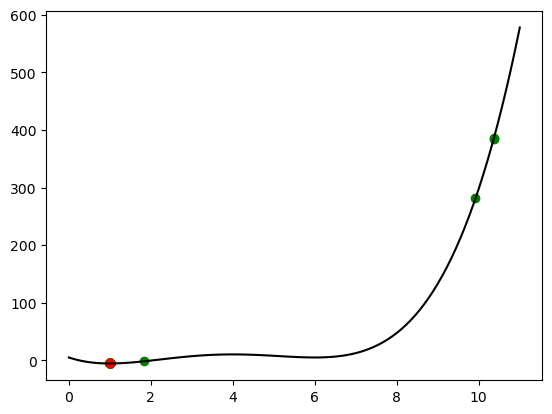

Generation 12: Best solution = 1.0000537047130624, Score = -5.416666645035607


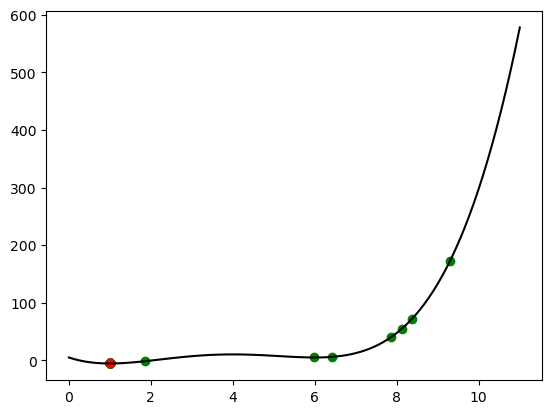

Generation 14: Best solution = 1.0000065474346966, Score = -5.416666666345153


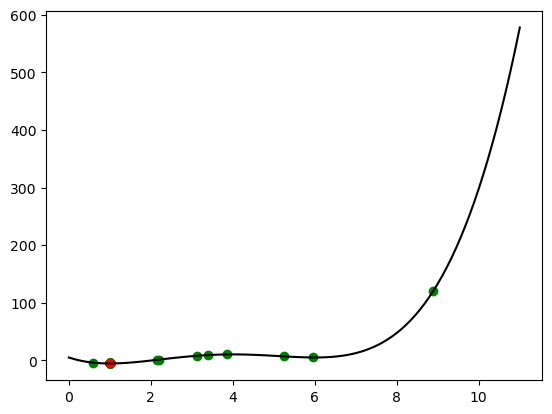

Generation 15: Best solution = 0.9999973807827505, Score = -5.416666666615214


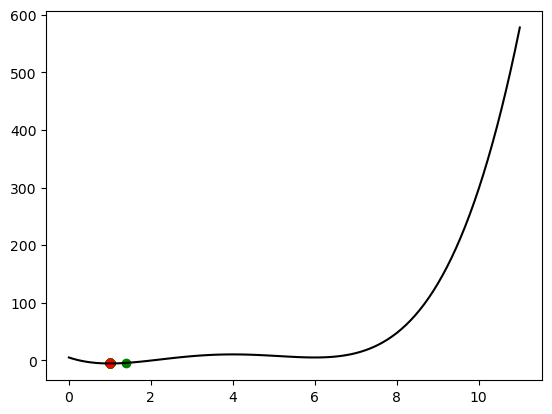

Generation 16: Best solution = 1.000000115350657, Score = -5.416666666666567


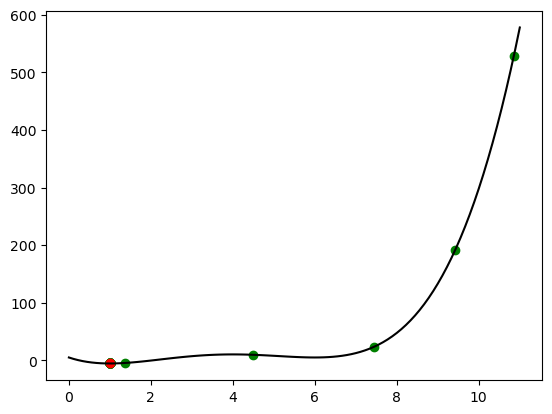

Generation 20: Best solution = 0.9999999986172522, Score = -5.416666666666666


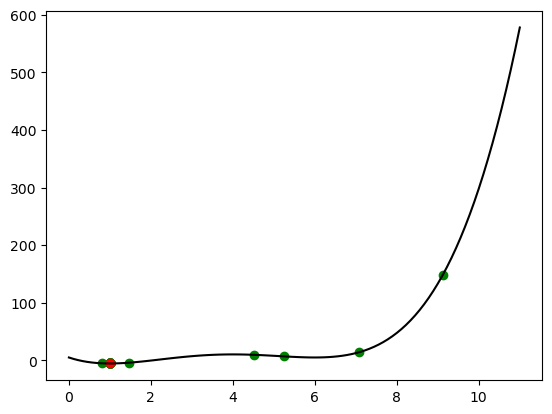

Generation 23: Best solution = 1.0000000089374987, Score = -5.416666666666669


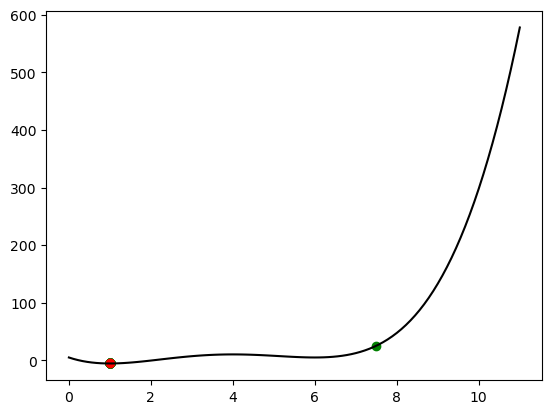

Generation 25: Best solution = 0.9999999943277216, Score = -5.41666666666667
Best found solution: x = 0.9999999943277216, f(x) = -5.41666666666667


In [24]:
fit = lambda x: 5 - 24 * x + 17 * x**2 - 11/3 * x**3 + 1/4 * x**4

generations = 100
population_size = 100
x_range = (0, 11)
mutation_rate = 0.1

best = genetic_algorithm(fit, generations, population_size, x_range, mutation_rate)
print(f"Best found solution: x = {best}, f(x) = {fit(best)}")

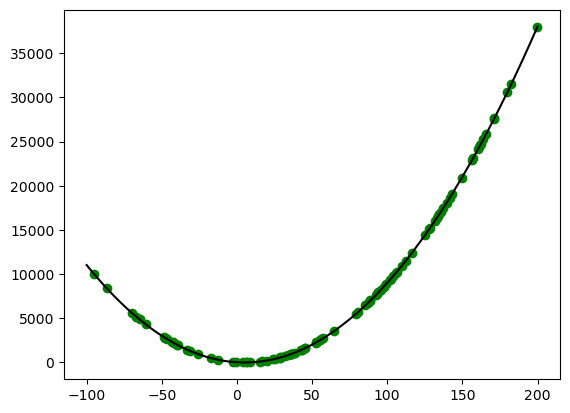

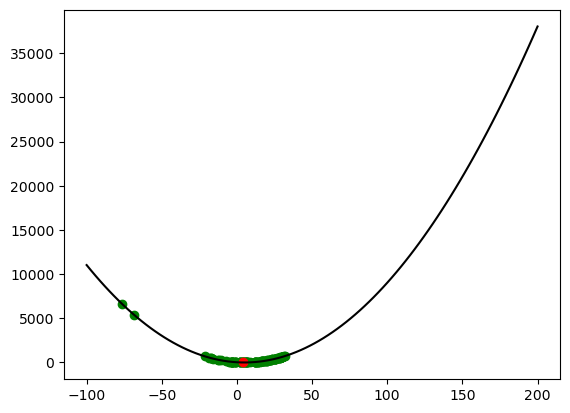

Generation 1: Best solution = 5.274105787574669, Score = -4.924866017218072


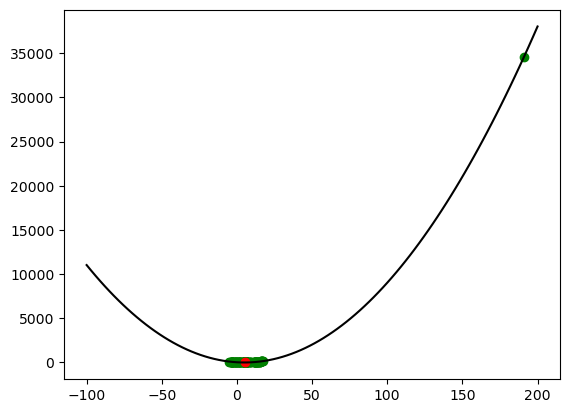

Generation 2: Best solution = 5.064386468050785, Score = -4.995854382731945


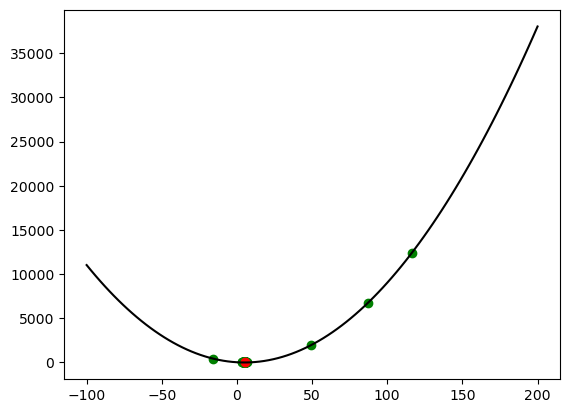

Generation 4: Best solution = 5.04929607775004, Score = -4.99756989671846


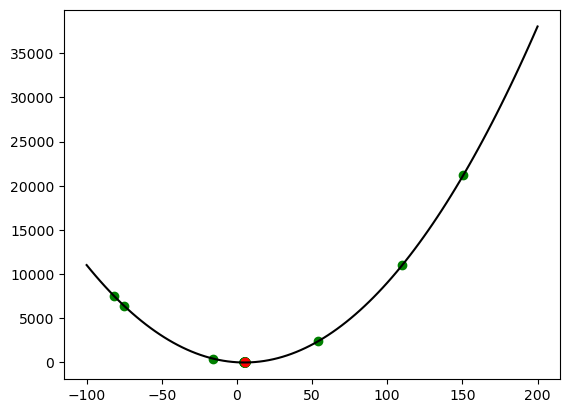

Generation 5: Best solution = 5.029055193649286, Score = -4.999155795722


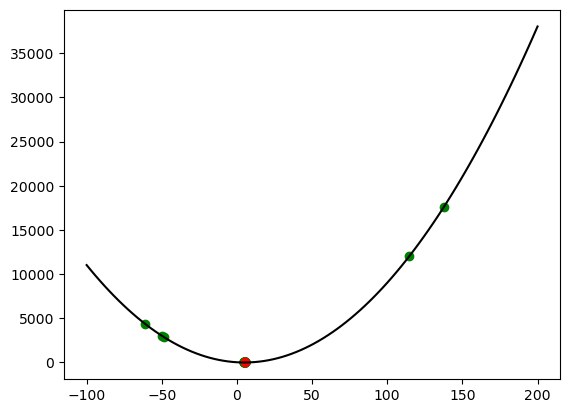

Generation 6: Best solution = 5.000937371639399, Score = -4.999999121334408


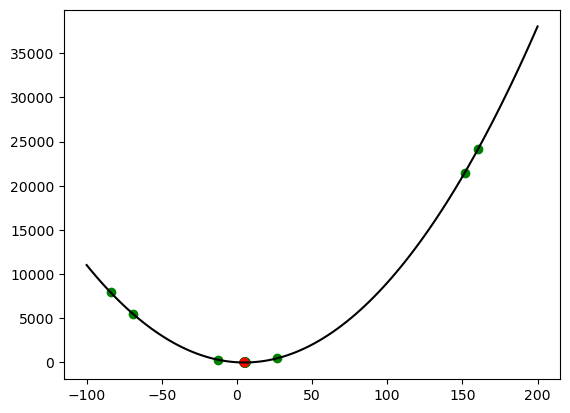

Generation 7: Best solution = 5.000082403747198, Score = -4.999999993209627


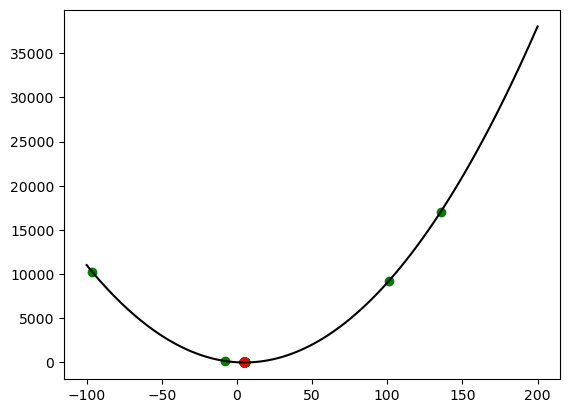

Generation 8: Best solution = 5.00001095180378, Score = -4.999999999880057


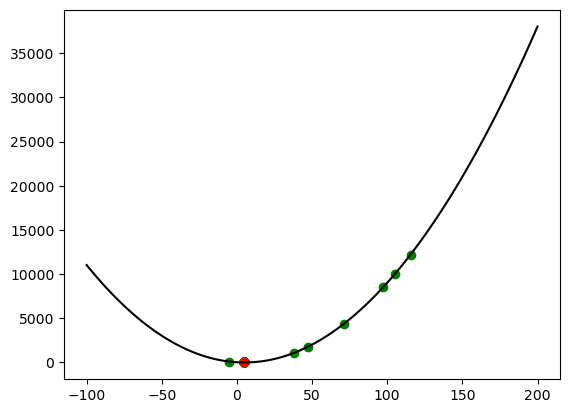

Generation 9: Best solution = 5.000010817268359, Score = -4.999999999882991


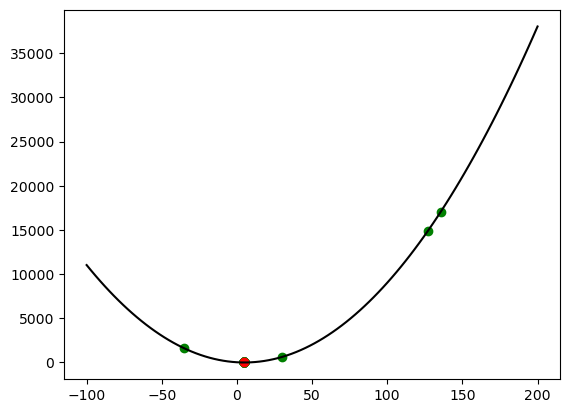

Generation 12: Best solution = 4.999997745634924, Score = -4.99999999999492


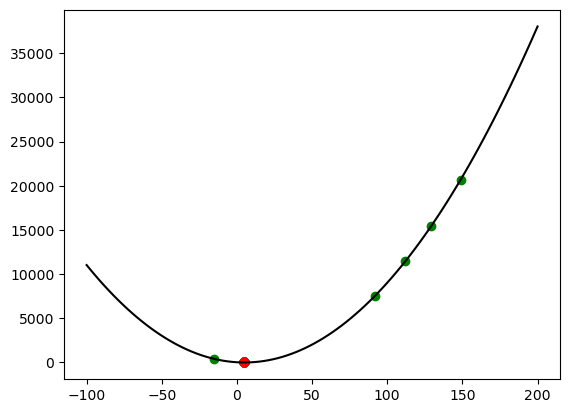

Generation 14: Best solution = 4.999999079359091, Score = -4.9999999999991545


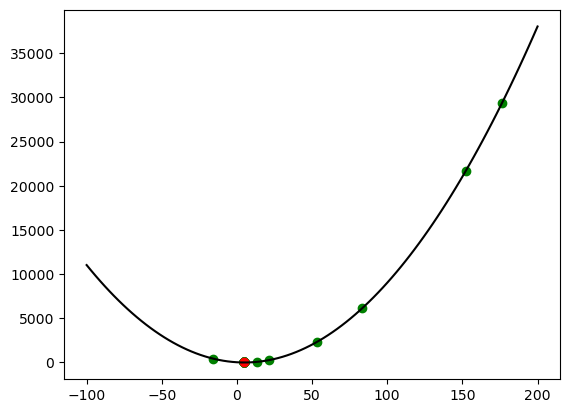

Generation 16: Best solution = 5.000000044984517, Score = -5.0


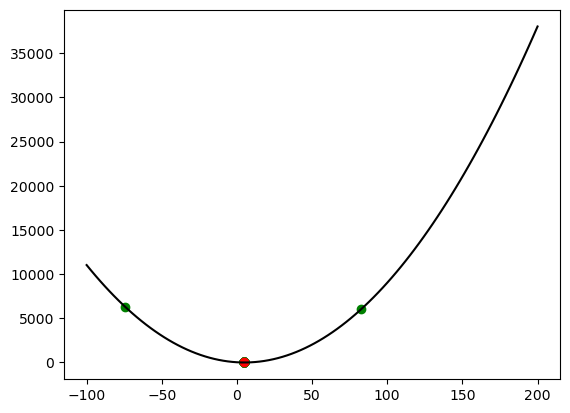

Generation 20: Best solution = 4.999999988654414, Score = -5.0000000000000036
Best found solution: x = 4.999999988654414, f(x) = -5.0000000000000036


In [25]:
# Расширение диапозона и другая функция
fit = lambda x: x**2 - 10*x + 20
generations = 100
population_size = 100
x_range = (-100, 200)
mutation_rate = 0.1

best = genetic_algorithm(fit, generations, population_size, x_range, mutation_rate)
print(f"Best found solution: x = {best}, f(x) = {fit(best)}")